In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle("../../output/speaker_corpus.pkl")

In [3]:
print(df)

           Date        Speaker  \
0    2011-09-20       BERNANKE   
1    2011-09-20        BULLARD   
2    2011-09-20      CARPENTER   
3    2011-09-20         DANKER   
4    2011-09-20         DUDLEY   
5    2011-09-20           DUKE   
6    2011-09-20        ENGLISH   
7    2011-09-20          EVANS   
8    2011-09-20         FISHER   
9    2011-09-20         GEORGE   
10   2011-09-20          KAMIN   
11   2011-09-20   KOCHERLAKOTA   
12   2011-09-20         LACKER   
13   2011-09-20       LOCKHART   
14   2011-09-20       PIANALTO   
15   2011-09-20        PLOSSER   
16   2011-09-20         RASKIN   
17   2011-09-20  REIFSCHNEIDER   
18   2011-09-20        REMACHE   
19   2011-09-20      ROBERTSON   
20   2011-09-20      ROSENGREN   
21   2011-09-20           SACK   
22   2011-09-20        SLIFMAN   
23   2011-09-20        TARULLO   
24   2011-09-20       WILLIAMS   
25   2011-09-20         YELLEN   
26   2011-11-01       BERNANKE   
27   2011-11-01        BULLARD   
28   2011-11-0

In [4]:
bernanke_df = df[df['Speaker']=="BERNANKE"]

In [5]:
print(bernanke_df)

          Date   Speaker                                            content
0   2011-09-20  BERNANKE    Good morning, everybody  This is a joint mee...
26  2011-11-01  BERNANKE    Good morning, everybody  This is a joint FOM...
54  2011-11-28  BERNANKE    Good morning, everybody  Thank you for joini...
69  2011-12-13  BERNANKE    Good morning, everybody  This is a joint mee...
94  2013-10-16  BERNANKE    Welcome, everybody  This is a joint meeting ...


In [6]:
bernanke_list = list(bernanke_df['content'])

In [7]:
print(bernanke_list)

['  Good morning, everybody  This is a joint meeting of the Federal Open Market Committee and the Board  I need a motion to close the meeting  Thank you  Let me start by welcoming Esther George to the table  Tom Hoenig is still president of the Federal Reserve Bank of Kansas City for another 10 days, and so officially you’re representing the Bank as first vice president, but at the next meeting, you will, of course, be succeeding Tom  You’re well known to everyone around the table  You’ve been in the System a long time, and you have a great deal of high regard  So again, welcome and congratulations  Our first item is “Financial Developments in Open Market Operations”  Let me turn it over to Brian Sack  Thank you  Questions for Brian?  President Plosser  Okay  Vice Chairman   President Lacker  President Fisher  Thanks  First of all, I think we all agree that the FOMC makes policy based on our economic outlook, and the markets have to adapt to that  There’s a bit of an observational equi

In [8]:
import sklearn

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vectorizer = CountVectorizer()

In [11]:
term_doc_matrix = vectorizer.fit_transform(bernanke_list).todense()

In [12]:
vectorizer.get_feature_names() 

['000',
 '03',
 '10',
 '100',
 '1030',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '1130',
 '114',
 '115',
 '118',
 '12',
 '124',
 '125',
 '126',
 '128',
 '13',
 '130',
 '135',
 '14',
 '142',
 '15',
 '152',
 '16',
 '168',
 '169',
 '17',
 '170',
 '171',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '186',
 '187',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '1933',
 '1939',
 '194',
 '1941',
 '195',
 '1958',
 '1970s',
 '1979',
 '198',
 '1987',
 '1990s',
 '1993',
 '1998',
 '20',
 '2000s',
 '2007',
 '2008',
 '2011',
 '2012',
 '2013',
 '203',
 '21',
 '215',
 '22',
 '227',
 '23',
 '233',
 '234',
 '238',
 '239',
 '24',
 '247',
 '248',
 '249',
 '25',
 '250',
 '252',
 '26',
 '260',
 '261',
 '27',
 '28',
 '282',
 '290',
 '30',
 '31',
 '315',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '3½',
 '40',
 '400',
 '40again',
 '43',
 '44',
 '4b',
 '50',
 '50another',
 '50both',
 '50mr',
 '50that',
 '50well',
 '552',
 '63',
 '700',
 '74',
 '75',
 '76'

In [13]:
term_doc_matrix

matrix([[ 1,  0,  1, ...,  8,  0,  8],
        [ 0,  1,  0, ..., 11,  1,  2],
        [ 0,  0,  0, ...,  4,  0,  0],
        [ 0,  0,  1, ...,  4,  0,  1],
        [ 0,  0,  0, ...,  4,  0,  0]])

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [20]:
bernanke_text = " ".join(bernanke_list)

In [21]:
bernanke_cloud = WordCloud(background_color='white', font_step = 3, relative_scaling=1).generate(bernanke_text)

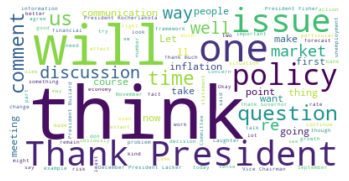

In [24]:
plt.imshow(bernanke_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
stopwords = stopwords.words("english")

[nltk_data] Downloading package stopwords to /home/anand/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [56]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
bernanke_tokens = []
for doc in bernanke_list:
    bernanke_tokens.append([token for token in tokenizer.tokenize(doc)])
len(bernanke_tokens)

5

In [58]:
bernanke_stopped = []
for token_list in bernanke_tokens:
    bernanke_stopped.append([token for token in token_list if token not in stopwords])
bernanke_stopped

[['Good',
  'morning',
  'everybody',
  'This',
  'joint',
  'meeting',
  'Federal',
  'Open',
  'Market',
  'Committee',
  'Board',
  'I',
  'need',
  'motion',
  'close',
  'meeting',
  'Thank',
  'Let',
  'start',
  'welcoming',
  'Esther',
  'George',
  'table',
  'Tom',
  'Hoenig',
  'still',
  'president',
  'Federal',
  'Reserve',
  'Bank',
  'Kansas',
  'City',
  'another',
  '10',
  'days',
  'officially',
  'representing',
  'Bank',
  'first',
  'vice',
  'president',
  'next',
  'meeting',
  'course',
  'succeeding',
  'Tom',
  'You',
  'well',
  'known',
  'everyone',
  'around',
  'table',
  'You',
  'System',
  'long',
  'time',
  'great',
  'deal',
  'high',
  'regard',
  'So',
  'welcome',
  'congratulations',
  'Our',
  'first',
  'item',
  'Financial',
  'Developments',
  'Open',
  'Market',
  'Operations',
  'Let',
  'turn',
  'Brian',
  'Sack',
  'Thank',
  'Questions',
  'Brian',
  'President',
  'Plosser',
  'Okay',
  'Vice',
  'Chairman',
  'President',
  'Lacker

In [47]:
from nltk.stem.porter import PorterStemmer

p_stemmer = PorterStemmer()

In [61]:
bernanke_stem = []
for doc in bernanke_stopped:
    bernanke_stem.append([p_stemmer.stem(word) for word in doc])
bernanke_stem

[['good',
  'morn',
  'everybodi',
  'thi',
  'joint',
  'meet',
  'feder',
  'open',
  'market',
  'committe',
  'board',
  'I',
  'need',
  'motion',
  'close',
  'meet',
  'thank',
  'let',
  'start',
  'welcom',
  'esther',
  'georg',
  'tabl',
  'tom',
  'hoenig',
  'still',
  'presid',
  'feder',
  'reserv',
  'bank',
  'kansa',
  'citi',
  'anoth',
  '10',
  'day',
  'offici',
  'repres',
  'bank',
  'first',
  'vice',
  'presid',
  'next',
  'meet',
  'cours',
  'succeed',
  'tom',
  'you',
  'well',
  'known',
  'everyon',
  'around',
  'tabl',
  'you',
  'system',
  'long',
  'time',
  'great',
  'deal',
  'high',
  'regard',
  'So',
  'welcom',
  'congratul',
  'our',
  'first',
  'item',
  'financi',
  'develop',
  'open',
  'market',
  'oper',
  'let',
  'turn',
  'brian',
  'sack',
  'thank',
  'question',
  'brian',
  'presid',
  'plosser',
  'okay',
  'vice',
  'chairman',
  'presid',
  'lacker',
  'presid',
  'fisher',
  'thank',
  'first',
  'I',
  'think',
  'agre',


In [52]:
#LDA

In [64]:
import gensim
from gensim import corpora, models
dictionary = corpora.Dictionary(bernanke_stem)
corpus = [dictionary.doc2bow(doc) for doc in bernanke_stem]

[(1, 1),
 (9, 1),
 (10, 1),
 (28, 1),
 (29, 13),
 (30, 1),
 (40, 1),
 (46, 1),
 (52, 2),
 (54, 2),
 (56, 6),
 (59, 1),
 (60, 8),
 (64, 6),
 (67, 90),
 (68, 3),
 (69, 4),
 (70, 1),
 (71, 6),
 (72, 3),
 (73, 3),
 (74, 1),
 (75, 3),
 (77, 3),
 (78, 17),
 (81, 7),
 (82, 10),
 (83, 1),
 (95, 1),
 (96, 2),
 (97, 4),
 (99, 1),
 (100, 4),
 (101, 9),
 (102, 1),
 (106, 2),
 (109, 1),
 (116, 4),
 (117, 1),
 (119, 1),
 (122, 3),
 (124, 3),
 (125, 2),
 (127, 5),
 (128, 2),
 (129, 2),
 (130, 2),
 (131, 1),
 (132, 1),
 (136, 11),
 (139, 2),
 (140, 1),
 (141, 3),
 (142, 1),
 (143, 3),
 (146, 2),
 (147, 2),
 (149, 1),
 (150, 2),
 (151, 2),
 (152, 1),
 (156, 1),
 (158, 1),
 (159, 3),
 (164, 7),
 (170, 1),
 (182, 1),
 (183, 1),
 (184, 3),
 (187, 2),
 (188, 29),
 (189, 2),
 (192, 3),
 (194, 2),
 (196, 5),
 (198, 5),
 (199, 1),
 (200, 3),
 (201, 1),
 (202, 1),
 (203, 1),
 (205, 3),
 (207, 2),
 (209, 8),
 (211, 4),
 (220, 9),
 (222, 3),
 (229, 1),
 (230, 3),
 (232, 1),
 (233, 19),
 (234, 2),
 (237, 12),
 (2

In [67]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=20)

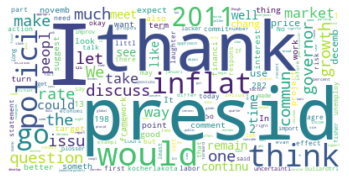

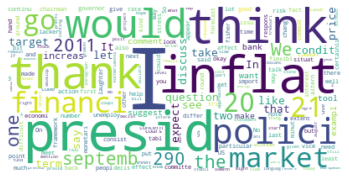

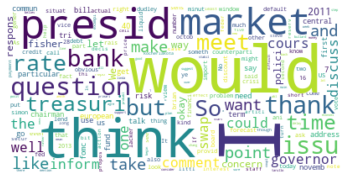

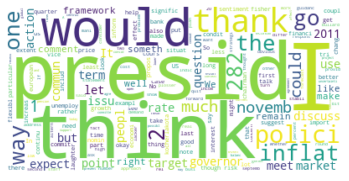

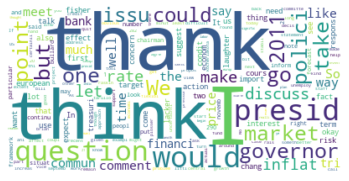

In [69]:
for t in range(5):

    plt.figure()
    
    plt.imshow(WordCloud(background_color='white').fit_words(dict(ldamodel.show_topic(t,200))),interpolation='bilinear')
    
    plt.axis('off')
    
    plt.show